# **Data Understanding**

In [1]:
import pandas as pd
file_path = "/content/drive/MyDrive/Customer Loyalty/TopicAorganics.xlsx"
df = pd.read_excel(file_path)
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


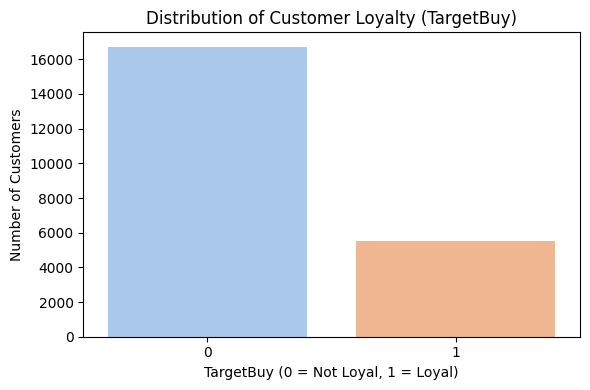

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TargetBuy', hue='TargetBuy', palette='pastel', legend=False)
plt.title('Distribution of Customer Loyalty (TargetBuy)')
plt.xlabel('TargetBuy (0 = Not Loyal, 1 = Loyal)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# **Data Preparation**

In [3]:
import pandas as pd
file_path = "/content/drive/MyDrive/Customer Loyalty/TopicAorganics.xlsx"
df = pd.read_excel(file_path)
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


**Drop irrelevant columns**

In [4]:
df = df.drop(columns=["ID", "DemCluster", "TargetAmt"])
df.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0


**Separate predictors and target**

In [5]:
X = df.drop(columns=["TargetBuy"])
y = df["TargetBuy"]
X.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0
1,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0
2,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0
3,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0
4,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0


**Check column types**

In [6]:
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns
print("Numerical Columns:", num_cols.tolist())
print("Categorical Columns:", cat_cols.tolist())

Numerical Columns: ['DemAffl', 'DemAge', 'PromSpend', 'PromTime']
Categorical Columns: ['DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass']


**Handle missing values**

In [7]:
from sklearn.impute import SimpleImputer

# Numerical: mean
num_imputer = SimpleImputer(strategy="mean")
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Categorical: most frequent
cat_imputer = SimpleImputer(strategy="most_frequent")
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

X.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0
1,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0
2,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0
3,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0
4,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0


**Encode categorical variables**

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,10.0,76.0,2,2,0,11,0,16000.00,4.0
1,4.0,49.0,3,2,0,11,0,6000.00,5.0
2,5.0,70.0,3,0,0,11,2,0.02,8.0
3,10.0,65.0,5,1,0,4,3,0.01,7.0
4,11.0,68.0,0,0,0,4,3,0.01,8.0


**Combine with target**

In [9]:
df_cleaned = X.copy()
df_cleaned["TargetBuy"] = y

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          22223 non-null  float64
 1   DemAge           22223 non-null  float64
 2   DemClusterGroup  22223 non-null  int64  
 3   DemGender        22223 non-null  int64  
 4   DemReg           22223 non-null  int64  
 5   DemTVReg         22223 non-null  int64  
 6   PromClass        22223 non-null  int64  
 7   PromSpend        22223 non-null  float64
 8   PromTime         22223 non-null  float64
 9   TargetBuy        22223 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.7 MB


In [10]:
df_cleaned.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,2,2,0,11,0,16000.00,4.0,0
1,4.0,49.0,3,2,0,11,0,6000.00,5.0,0
2,5.0,70.0,3,0,0,11,2,0.02,8.0,1
3,10.0,65.0,5,1,0,4,3,0.01,7.0,1
4,11.0,68.0,0,0,0,4,3,0.01,8.0,0


# **Exploratory Data Analysis (EDA)**
**Boxplots for Continuous Variables vs TargetBuy**

<ipython-input-11-d21878db1b63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TargetBuy', y='DemAffl', data=df_cleaned, palette='Set2')


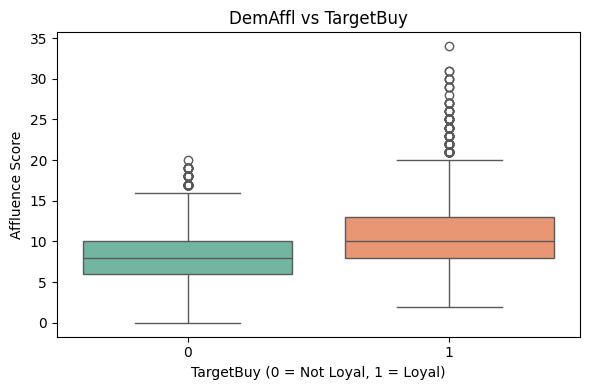

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='TargetBuy', y='DemAffl', data=df_cleaned, palette='Set2')
plt.title('DemAffl vs TargetBuy')
plt.xlabel('TargetBuy (0 = Not Loyal, 1 = Loyal)')
plt.ylabel('Affluence Score')
plt.tight_layout()
plt.show()

**DemAffl vs TargetBuy**

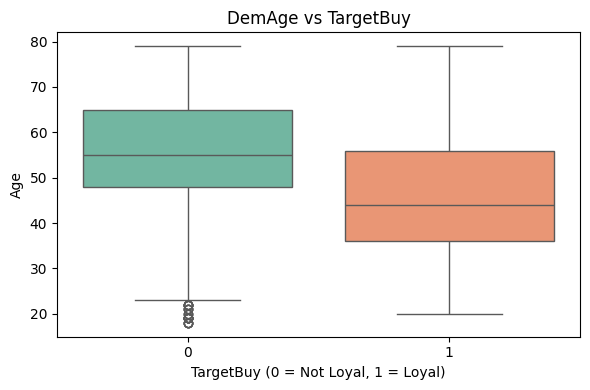

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='TargetBuy', y='DemAge', hue='TargetBuy', data=df_cleaned, palette='Set2', legend=False)
plt.title('DemAge vs TargetBuy')
plt.xlabel('TargetBuy (0 = Not Loyal, 1 = Loyal)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

**PromSpend vs TargetBuy**

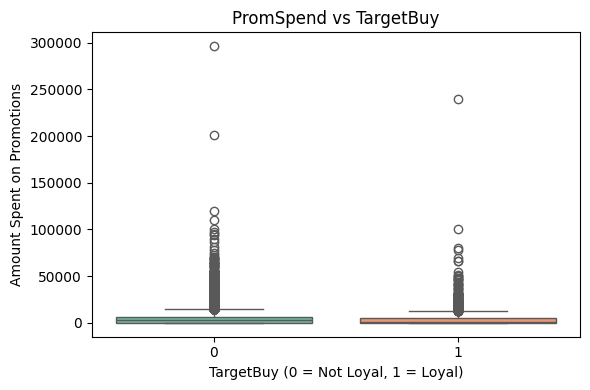

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='TargetBuy', y='PromSpend', hue='TargetBuy', data=df_cleaned, palette='Set2', legend=False)
plt.title('PromSpend vs TargetBuy')
plt.xlabel('TargetBuy (0 = Not Loyal, 1 = Loyal)')
plt.ylabel('Amount Spent on Promotions')
plt.tight_layout()
plt.show()

**PromSpend vs TargetBuy**

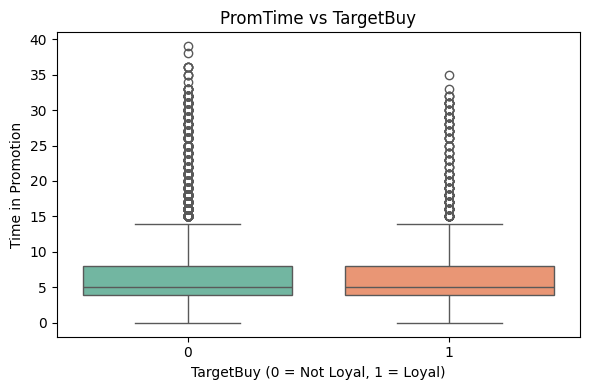

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='TargetBuy', y='PromTime', hue='TargetBuy', data=df_cleaned, palette='Set2', legend=False)
plt.title('PromTime vs TargetBuy')
plt.xlabel('TargetBuy (0 = Not Loyal, 1 = Loyal)')
plt.ylabel('Time in Promotion')
plt.tight_layout()
plt.show()

**Bar Charts for Categoral Variable vs TargetBuy**

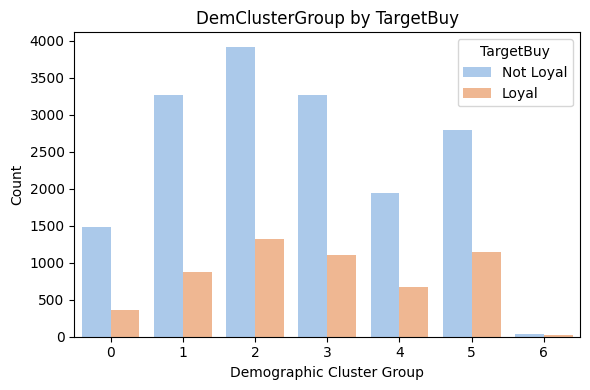

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DemClusterGroup', hue='TargetBuy', data=df_cleaned, palette='pastel')
plt.title('DemClusterGroup by TargetBuy')
plt.xlabel('Demographic Cluster Group')
plt.ylabel('Count')
plt.legend(title='TargetBuy', labels=['Not Loyal', 'Loyal'])
plt.tight_layout()
plt.show()

**DemGender vs TargetBuy**

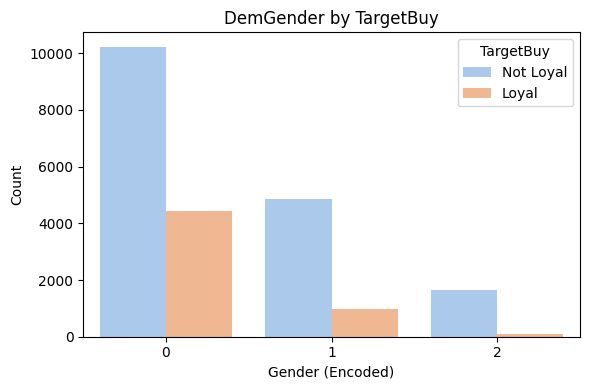

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DemGender', hue='TargetBuy', data=df_cleaned, palette='pastel')
plt.title('DemGender by TargetBuy')
plt.xlabel('Gender (Encoded)')
plt.ylabel('Count')
plt.legend(title='TargetBuy', labels=['Not Loyal', 'Loyal'])
plt.tight_layout()
plt.show()

**DemReg vs TargetBuy**

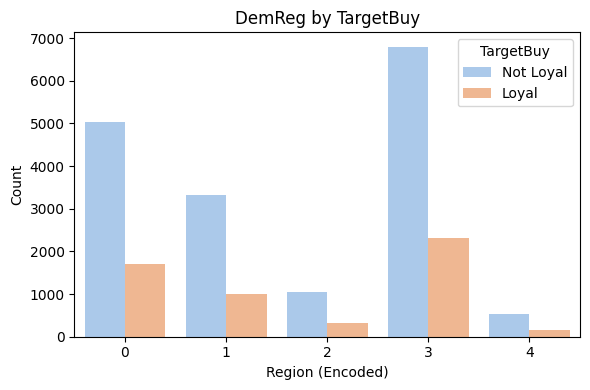

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DemReg', hue='TargetBuy', data=df_cleaned, palette='pastel')
plt.title('DemReg by TargetBuy')
plt.xlabel('Region (Encoded)')
plt.ylabel('Count')
plt.legend(title='TargetBuy', labels=['Not Loyal', 'Loyal'])
plt.tight_layout()
plt.show()

**DemTVReg vs TargetBuy**

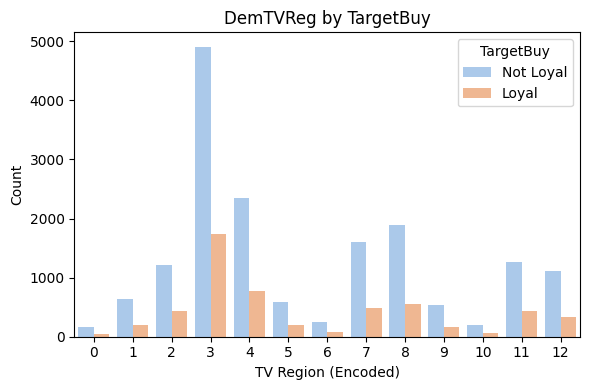

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='DemTVReg', hue='TargetBuy', data=df_cleaned, palette='pastel')
plt.title('DemTVReg by TargetBuy')
plt.xlabel('TV Region (Encoded)')
plt.ylabel('Count')
plt.legend(title='TargetBuy', labels=['Not Loyal', 'Loyal'])
plt.tight_layout()
plt.show()

**PromClass vs TargetBuy**

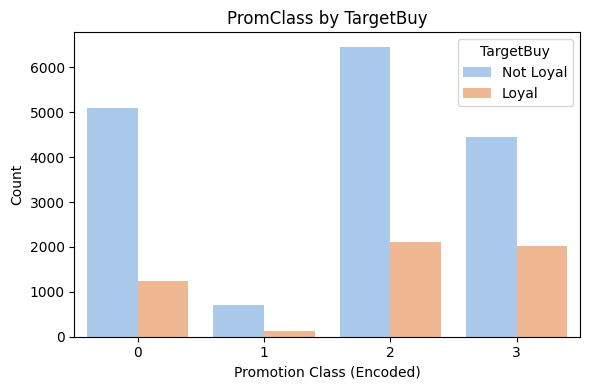

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='PromClass', hue='TargetBuy', data=df_cleaned, palette='pastel')
plt.title('PromClass by TargetBuy')
plt.xlabel('Promotion Class (Encoded)')
plt.ylabel('Count')
plt.legend(title='TargetBuy', labels=['Not Loyal', 'Loyal'])
plt.tight_layout()
plt.show()

# **Modeling**

## Modeling Approach:
Since the target variable `TargetBuy` is binary (1 = loyal, 0 = not loyal), a classification approach is appropriate. Models such as logistic regression, decision trees, random forests, and gradient boosting will be suitable candidates for this task.

## Suggested Metrics:
To present results to a business manager, the following metrics are most relevant:
- **Accuracy**: Overall prediction performance.
- **Recall**: Important to identify as many loyal customers as possible for targeted campaigns.
- **F1 Score**: Useful in handling class imbalance by balancing precision and recall.
- **AUC-ROC**: Good overall indicator of model discrimination capability.

## Variables:
- **Target**: `TargetBuy`
- **Predictors**: All remaining preprocessed variables excluding `ID`, `DemCluster`, and `TargetAmt` (which are excluded by instruction).